4.1 Leave-one-out solutions in M-estimation

(a) Sherman-Morrison-Woodbury Formula

(b) 

In [2]:
# (c)
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from generate_outlier_data import *

In [13]:
def loss(t):
    if t > 0:
        return 2 * np.log(1 + np.exp(-t)) + t
    else:
        return 2 * np.log(1 + np.exp(t)) - t

def loss_first_derivative(t):
    return 1 / (1 + np.exp(-t)) - 1 / (1 + np.exp(t))

def loss_second_derivative(t):
    return 2 / ((1 + np.exp(t)) * (1 + np.exp(-t)))

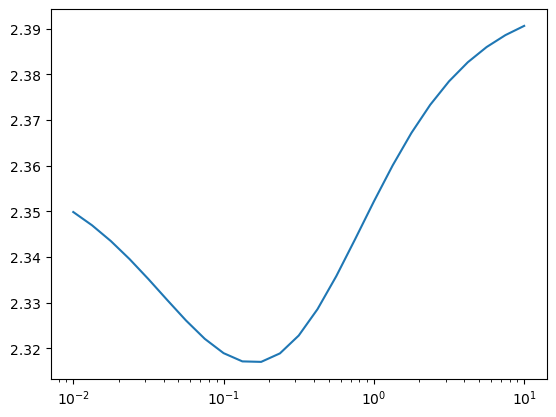

In [57]:
lambda_list = np.geomspace(start=0.01, stop=10, num=25)
X_train, y_train, X_test, y_test = generate_data()
n, d = X_train.shape
def leave_one_out(X_train, y_train, lambda_list):
    LOO_list = []
    for Lambda in lambda_list:
        LOO = 0
        beta_hat = minimize_robust_ridge(X_train, y_train, Lambda)
        eps_hat = y_train - X_train @ beta_hat
        H = X_train.T @ np.diag(1 / n * loss_second_derivative(eps_hat)) @ X_train + Lambda * np.eye(d)
        for k in range(n):
            H_k = H - 1 / n * loss_second_derivative(eps_hat[k]) * np.outer(X_train[k], X_train[k])
            H_k_inv = np.linalg.inv(H_k)
            g_k = 1 / n * loss_first_derivative(eps_hat[k]) * X_train[k]
            eps_hat_no_k = eps_hat[k] + X_train[k] @ H_k_inv @ g_k
            LOO += 1 / n * loss(eps_hat_no_k)
        LOO_list.append(LOO)
    return LOO_list

LOO_list = leave_one_out(X_train, y_train, lambda_list)

plt.plot(lambda_list, LOO_list)
plt.xscale('log')
plt.show()

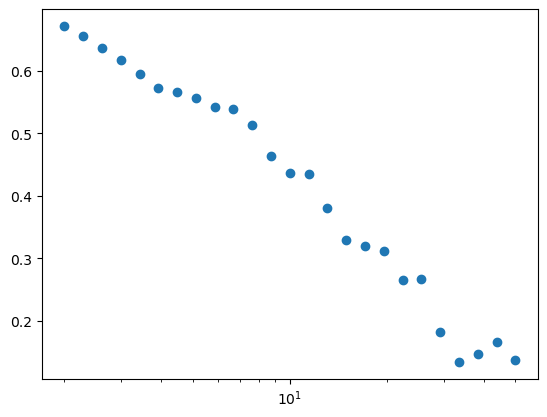

In [58]:
# (d)
lambda_hat = lambda_list[np.argmin(LOO_list)]
beta_hat = minimize_robust_ridge(X_train, y_train, lambda_hat)
ERR_test = np.median(np.abs(y_test - X_test @ beta_hat))
lambda_list = np.geomspace(2, 50, 25)

def Ridge(X, y, Lambda):
    return np.linalg.solve(X.T @ X + Lambda * np.eye(X.shape[1]), X.T @ y)

ERR_test_ls_lambda_list = []
for Lambda in lambda_list:
    beta_hat_ls_lambda = Ridge(X_train, y_train, Lambda)
    ERR_test_ls_lambda_list.append(np.median(np.abs(y_test - X_test @ beta_hat_ls_lambda)))

plt.scatter(lambda_list, ERR_test_ls_lambda_list - ERR_test)
plt.xscale('log')
plt.show()

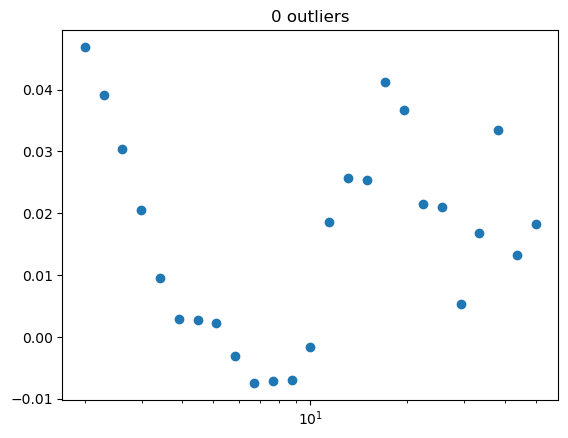

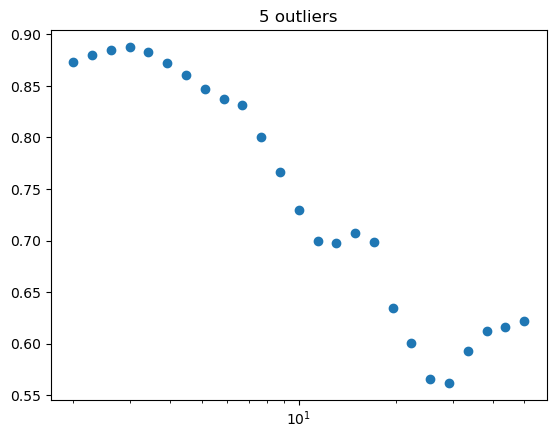

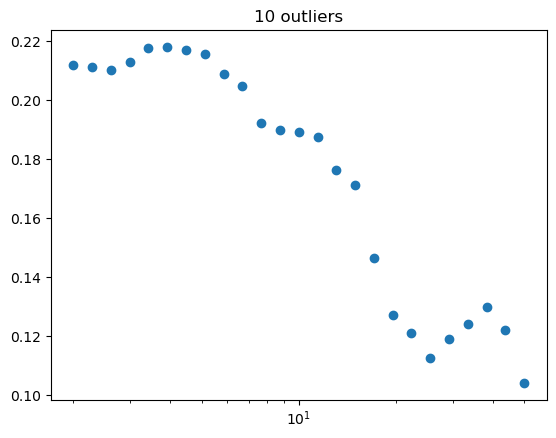

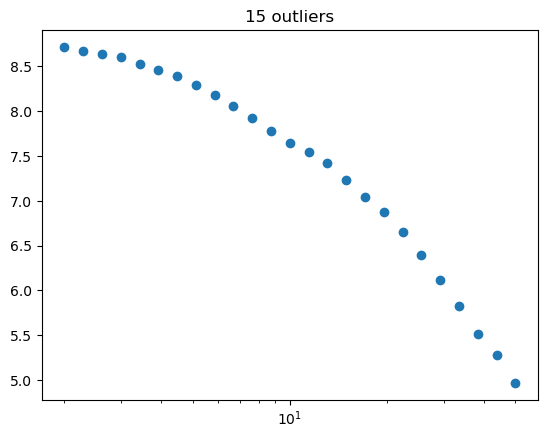

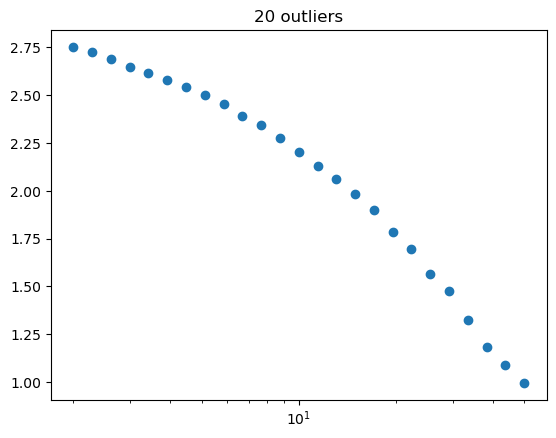

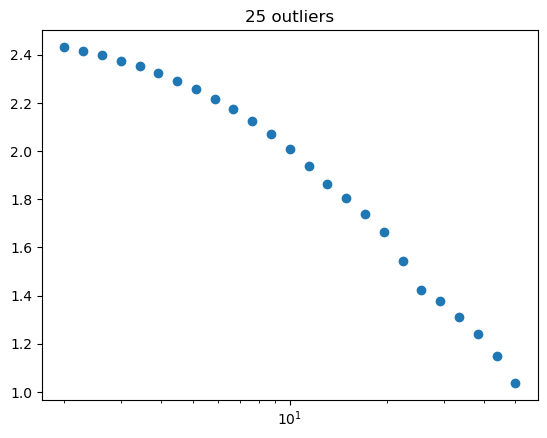

In [45]:
# (e)
for num_outliers in [0, 5, 10, 15, 20, 25]:
    X_train, y_train, X_test, y_test = generate_data(num_outliers=num_outliers)
    lambda_list = np.geomspace(start=0.01, stop=10, num=25)
    LOO_list = leave_one_out(X_train, y_train, lambda_list)
    lambda_hat = lambda_list[np.argmin(LOO_list)]
    beta_hat = minimize_robust_ridge(X_train, y_train, lambda_hat)
    ERR_test = np.median(np.abs(y_test - X_test @ beta_hat))
    lambda_list = np.geomspace(2, 50, 25)
    ERR_test_ls_lambda_list = []
    for Lambda in lambda_list:
        beta_hat_ls_lambda = Ridge(X_train, y_train, Lambda)
        ERR_test_ls_lambda_list.append(np.median(np.abs(y_test - X_test @ beta_hat_ls_lambda)))
    plt.scatter(lambda_list, ERR_test_ls_lambda_list - ERR_test)
    plt.title(f'{num_outliers} outliers')
    plt.xscale('log')
    plt.show()